In [1]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



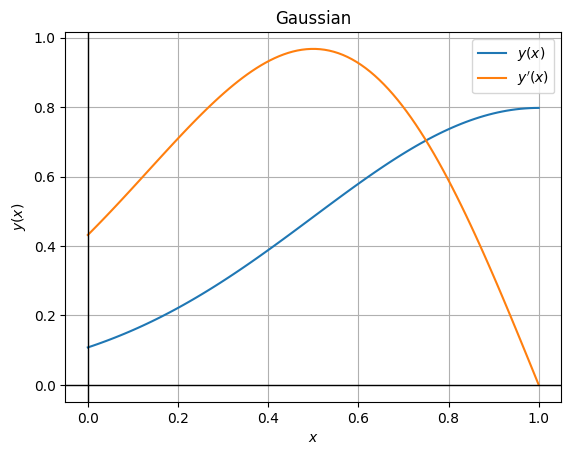

In [2]:
def gaussian(x):
    sigma = 0.5
    mu = 1

    return 1 / ( sigma * np.sqrt(2 * np.pi)) * torch.exp(-0.5 * (x - mu) **2 / (sigma ** 2))

fig, ax = plt.subplots()
xs = np.linspace(0, 1, 100)
xs = torch.tensor(xs, requires_grad=True)
ys = gaussian(xs)
yp = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]
ypp = torch.autograd.grad(yp, xs, torch.ones_like(xs), create_graph=True)[0]

xs = xs.detach().numpy()
ys = ys.detach().numpy()
yp = yp.detach().numpy()
ypp = ypp.detach().numpy()

ax.plot(xs, ys, label=r'$y(x)$')
ax.plot(xs, yp, label=r'$y^\prime(x)$')

format_axis(ax, r'$x$', r'$y(x)$', title= 'Gaussian')
coordinate_axes(ax)
ax.grid()




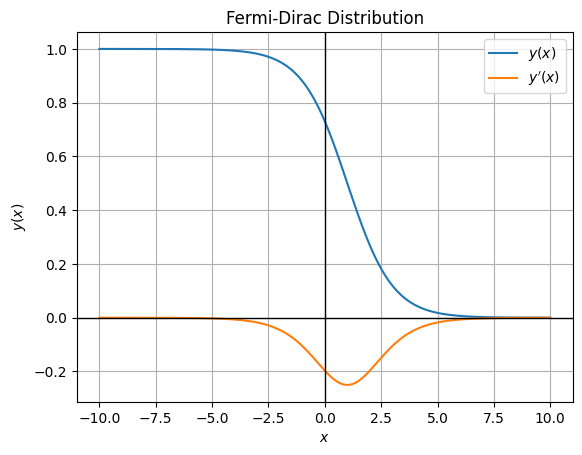

In [3]:
def fermian(x):
    kT = 1
    mu = 1
    return 1 / (torch.exp( (x - mu) / kT) + 1)



fig, ax = plt.subplots()
xs = np.linspace(-10, 10, 1000)
xs = torch.tensor(xs, requires_grad=True)
ys = fermian(xs)
yp = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]


xs = xs.detach().numpy()
ys = ys.detach().numpy()
yp = yp.detach().numpy()


ax.plot(xs, ys, label=r'$y(x)$')
ax.plot(xs, yp, label=r'$y^\prime(x)$')

format_axis(ax, r'$x$', r'$y(x)$', title = 'Fermi-Dirac Distribution')
coordinate_axes(ax)
ax.grid()




[(0.0, 3.0), (-2.0, 5.0)]

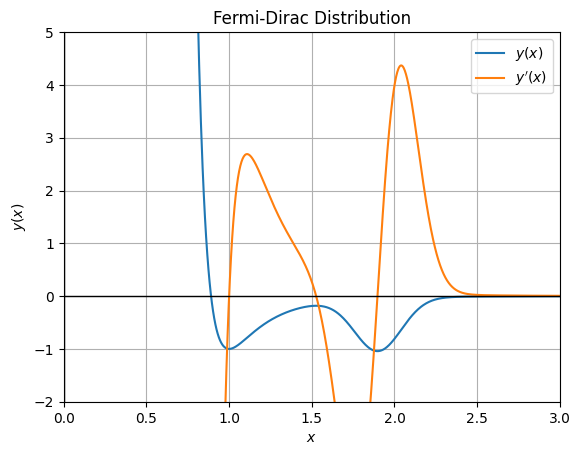

In [6]:
calc = LennardJonesGaussTorch(eps = 1, r0=1.9)

fig, ax = plt.subplots()
xs = np.linspace(0.5, 4, 1000)
xs = torch.tensor(xs, requires_grad=True)
ys = calc._V(xs)
yp = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]


xs = xs.detach().numpy()
ys = ys.detach().numpy()
yp = yp.detach().numpy()


ax.plot(xs, ys, label=r'$y(x)$')
ax.plot(xs, yp, label=r'$y^\prime(x)$')

format_axis(ax, r'$x$', r'$y(x)$', title = 'Lennard-Jones-Gauss Distribution')
coordinate_axes(ax)
ax.grid()


ax.set(xlim = (0,3), ylim = (-2, 5))

